In [1]:
import requests
from datetime import datetime
import numpy as np
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import time
from scipy.stats import linregress

In [2]:
from config import weather_api_key

In [3]:
# print 1500 random lats
lats = np.random.uniform(-90.000, 90.000, 1500)
lngs = np.random.uniform(-180,180,1500)
lat_lngs = list(zip(lats,lngs))

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
# print(cities)

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Cleveland"
units = "Imperial"
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
#     city_url = url + "&q=" + city.replace(" ","+")
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    print(city_url)

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=samusu&units=Imperial
Processing Record 1 of Set 1 | samusu
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=salalah&units=Imperial
Processing Record 2 of Set 1 | salalah
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=cabo san lucas&units=Imperial
Processing Record 3 of Set 1 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=fairbanks&units=Imperial
Processing Record 4 of Set 1 | fairbanks
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=ponta do sol&units=Imperial
Processing Record 5 of Set 1 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=jamestown&units=Imperial
Processing Record 6 of 

http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=rio pardo de minas&units=Imperial
Processing Record 3 of Set 2 | rio pardo de minas
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=naze&units=Imperial
Processing Record 4 of Set 2 | naze
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=mount isa&units=Imperial
Processing Record 5 of Set 2 | mount isa
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=kruisfontein&units=Imperial
Processing Record 6 of Set 2 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=bluff&units=Imperial
Processing Record 7 of Set 2 | bluff
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=westport&units=Imperial
Processing Record 8 of Set 2 | westport
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c78

http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=arraial do cabo&units=Imperial
Processing Record 6 of Set 3 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=te anau&units=Imperial
Processing Record 7 of Set 3 | te anau
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=nabire&units=Imperial
Processing Record 8 of Set 3 | nabire
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=pisco&units=Imperial
Processing Record 9 of Set 3 | pisco
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=pierre&units=Imperial
Processing Record 10 of Set 3 | pierre
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=mahajanga&units=Imperial
Processing Record 11 of Set 3 | mahajanga
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&

http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=hobyo&units=Imperial
Processing Record 9 of Set 4 | hobyo
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=byron bay&units=Imperial
Processing Record 10 of Set 4 | byron bay
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=nizhneyansk&units=Imperial
Processing Record 11 of Set 4 | nizhneyansk
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=san vicente&units=Imperial
Processing Record 12 of Set 4 | san vicente
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=iqaluit&units=Imperial
Processing Record 13 of Set 4 | iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=oneonta&units=Imperial
Processing Record 14 of Set 4 | oneonta
http://api.openweathermap.org/data/2.5/weather?appi

http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=rotifunk&units=Imperial
Processing Record 12 of Set 5 | rotifunk
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=zaysan&units=Imperial
Processing Record 13 of Set 5 | zaysan
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=terlicko&units=Imperial
Processing Record 14 of Set 5 | terlicko
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=karak&units=Imperial
Processing Record 15 of Set 5 | karak
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=mahibadhoo&units=Imperial
Processing Record 16 of Set 5 | mahibadhoo
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=mys shmidta&units=Imperial
Processing Record 17 of Set 5 | mys shmidta
City not found. Skipping...
http://api.openweathermap.

http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=hermanus&units=Imperial
Processing Record 15 of Set 6 | hermanus
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=itapua poty&units=Imperial
Processing Record 16 of Set 6 | itapua poty
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=adand&units=Imperial
Processing Record 17 of Set 6 | adand
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=sterling&units=Imperial
Processing Record 18 of Set 6 | sterling
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=vestmanna&units=Imperial
Processing Record 19 of Set 6 | vestmanna
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=whitehorse&units=Imperial
Processing Record 20 of Set 6 | whitehorse
http://api.openweathermap.org/data/2.5/weather?a

City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=gushikawa&units=Imperial
Processing Record 19 of Set 7 | gushikawa
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=shelburne&units=Imperial
Processing Record 20 of Set 7 | shelburne
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=olafsvik&units=Imperial
Processing Record 21 of Set 7 | olafsvik
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=warqla&units=Imperial
Processing Record 22 of Set 7 | warqla
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=rawson&units=Imperial
Processing Record 23 of Set 7 | rawson
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=urucara&units=Imperial
Processing Record 24 of Set 7 | urucara
http://api.openweathermap.org/da

City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=sechura&units=Imperial
Processing Record 22 of Set 8 | sechura
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=port elizabeth&units=Imperial
Processing Record 23 of Set 8 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=vanderhoof&units=Imperial
Processing Record 24 of Set 8 | vanderhoof
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=udachnyy&units=Imperial
Processing Record 25 of Set 8 | udachnyy
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=espinosa&units=Imperial
Processing Record 26 of Set 8 | espinosa
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=benguela&units=Imperial
Processing Record 27 of Set 8 | benguela
http://api.openweathermap.org/data/2.5/w

http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=panzhihua&units=Imperial
Processing Record 25 of Set 9 | panzhihua
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=pogar&units=Imperial
Processing Record 26 of Set 9 | pogar
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=luganville&units=Imperial
Processing Record 27 of Set 9 | luganville
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=yambio&units=Imperial
Processing Record 28 of Set 9 | yambio
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=russell&units=Imperial
Processing Record 29 of Set 9 | russell
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=clyde river&units=Imperial
Processing Record 30 of Set 9 | clyde river
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba227

http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=kiama&units=Imperial
Processing Record 28 of Set 10 | kiama
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=makakilo city&units=Imperial
Processing Record 29 of Set 10 | makakilo city
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=saldanha&units=Imperial
Processing Record 30 of Set 10 | saldanha
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=sobolevo&units=Imperial
Processing Record 31 of Set 10 | sobolevo
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=mana&units=Imperial
Processing Record 32 of Set 10 | mana
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=la macarena&units=Imperial
Processing Record 33 of Set 10 | la macarena
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a

http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=tautira&units=Imperial
Processing Record 31 of Set 11 | tautira
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=bilma&units=Imperial
Processing Record 32 of Set 11 | bilma
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=bojaya&units=Imperial
Processing Record 33 of Set 11 | bojaya
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=bafoulabe&units=Imperial
Processing Record 34 of Set 11 | bafoulabe
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=darnah&units=Imperial
Processing Record 35 of Set 11 | darnah
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=melito di porto salvo&units=Imperial
Processing Record 36 of Set 11 | melito di porto salvo
http://api.openweathermap.org/data/2

http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=sao miguel dos campos&units=Imperial
Processing Record 32 of Set 12 | sao miguel dos campos
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=zeya&units=Imperial
Processing Record 33 of Set 12 | zeya
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=viligili&units=Imperial
Processing Record 34 of Set 12 | viligili
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=falealupo&units=Imperial
Processing Record 35 of Set 12 | falealupo
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=lillooet&units=Imperial
Processing Record 36 of Set 12 | lillooet
http://api.openweathermap.org/data/2.5/weather?appid=f9a3e3e7e6f1ac50c785a5e9ba2273ac&q=yankton&units=Imperial
Processing Record 37 of Set 12 | yankton
ht

In [7]:
# check length of city data
print(len(city_data))

541


In [8]:
city_data_df = pd.DataFrame(city_data)
new_column_order = ['City', 'Country','Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Salalah,OM,2021-03-28 22:34:12,17.0151,54.0924,77.00,53,0,3.44
1,Cabo San Lucas,MX,2021-03-28 22:36:11,22.8909,-109.9124,75.99,27,40,11.50
2,Fairbanks,US,2021-03-28 22:35:02,64.8378,-147.7164,19.00,48,1,3.44
3,Ponta Do Sol,PT,2021-03-28 22:36:13,32.6667,-17.1000,62.60,77,20,13.80
4,Jamestown,US,2021-03-28 22:35:04,42.0970,-79.2353,42.01,75,90,22.82
...,...,...,...,...,...,...,...,...,...
536,Monrovia,LR,2021-03-28 22:39:09,6.3005,-10.7969,78.80,94,75,3.58
537,Upington,ZA,2021-03-28 22:40:54,-28.4478,21.2561,60.80,55,0,2.30
538,Newcastleton,GB,2021-03-28 22:40:54,55.1796,-2.8127,50.00,100,90,34.52
539,Sola,VU,2021-03-28 22:40:55,-13.8833,167.5500,84.20,84,75,5.75


In [9]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
today = time.strftime("%x")
print(today)

03/28/21


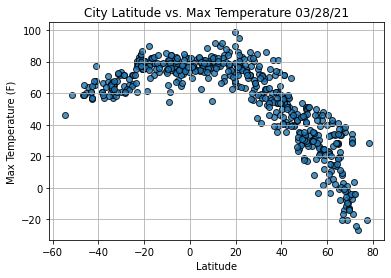

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig1.png")

# Show plot.
plt.show()

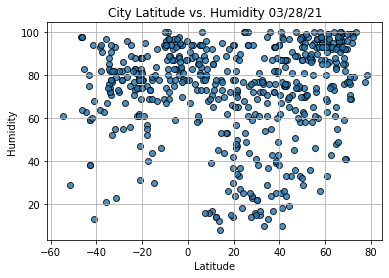

In [13]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig2.png")

# Show plot.
plt.show()

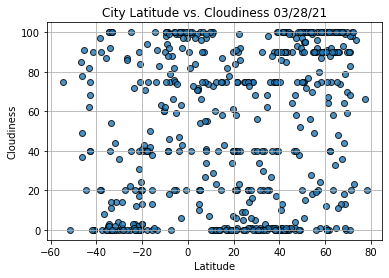

In [14]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig3.png")

# Show plot.
plt.show()

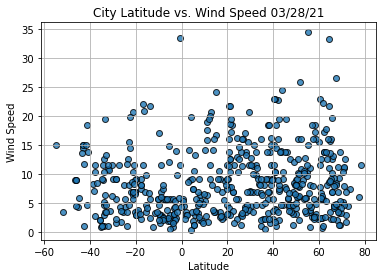

In [15]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig4.png")

# Show plot.
plt.show()

In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print(f"The r value is: {r_value}")
    print(f"The p value is: {p_value}")
    print(f"The standard error is: {std_err}")

In [17]:
# separate df by northern and southern hemispheres
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
5,Mataura,NZ,2021-03-28 22:36:15,-46.1927,168.8643,59.00,98,37,8.99
8,Hobart,AU,2021-03-28 22:33:44,-42.8794,147.3294,57.20,38,40,14.97
10,Noumea,NC,2021-03-28 22:36:17,-22.2763,166.4572,82.99,61,0,6.91
12,Puerto Ayora,EC,2021-03-28 22:36:18,-0.7393,-90.3518,82.40,78,20,11.50
13,Cap Malheureux,MU,2021-03-28 22:36:18,-19.9842,57.6142,77.00,81,3,3.00


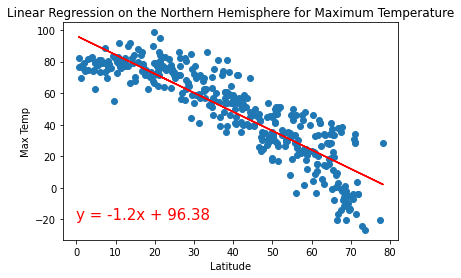

The r value is: -0.8819025637498619
The p value is: 6.866712236078101e-123
The standard error is: 0.0334731175531913


In [18]:
# Linear regression on the Northern Hemisphere and Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(0,-20))

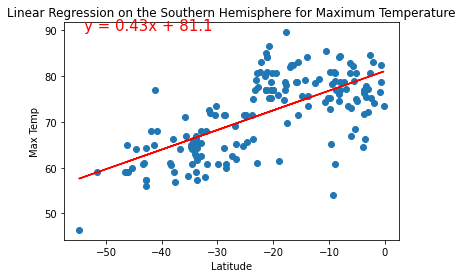

The r value is: 0.6690706913194838
The p value is: 2.728198675943758e-23
The standard error is: 0.03682664743488687


In [19]:
# Linear regression on the Southern Hemisphere and Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-54,90))

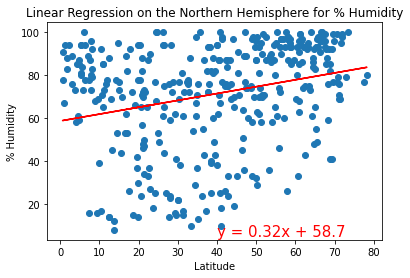

The r value is: 0.2670666558586336
The p value is: 1.7048780746500303e-07
The standard error is: 0.05992676948106631


In [20]:
# Linear regression on the Northern Hemisphere and Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,5))

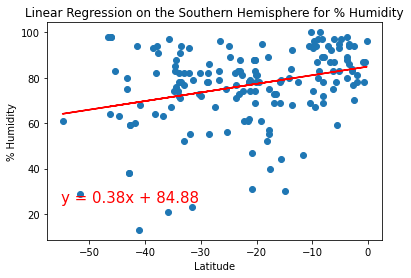

The r value is: 0.3012654303239147
The p value is: 6.884075328256921e-05
The standard error is: 0.09291347211112835


In [21]:
# Linear regression on the Southern Hemisphere and Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-55,25))

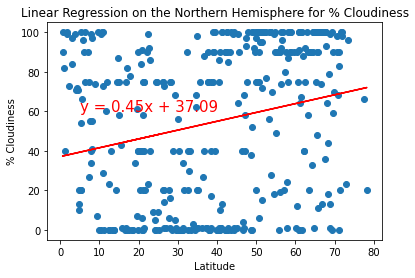

The r value is: 0.23327794609078856
The p value is: 5.44039287008749e-06
The standard error is: 0.09679698570358651


In [22]:
# Linear regression on the Northern Hemisphere and Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(5,60))

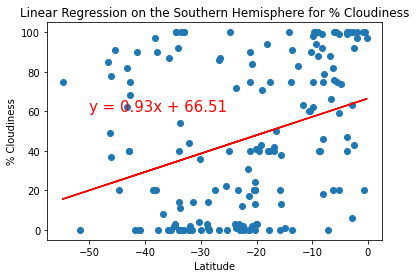

The r value is: 0.32187257903430344
The p value is: 1.977537168097847e-05
The standard error is: 0.2115999661359876


In [23]:
# Linear regression on the Southern Hemisphere and Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

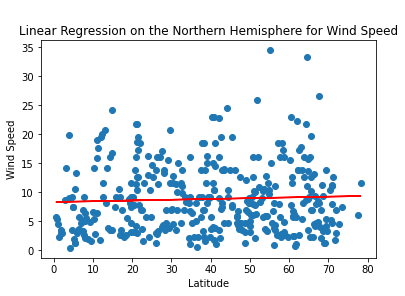

The r value is: 0.04599210097269108
The p value is: 0.3764013622233613
The standard error is: 0.014962511138923886


In [24]:
# Linear regression on the Northern Hemisphere and Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(0,40))

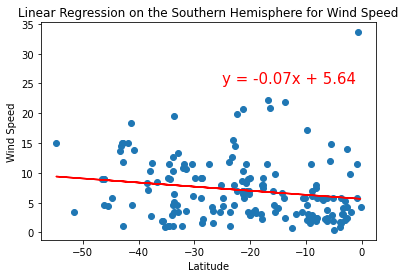

The r value is: -0.1731862131764752
The p value is: 0.02433779896084451
The standard error is: 0.030156290394100498


In [25]:
# Linear regression on the Southern Hemisphere and Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-25,25))